In [289]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import re

#Read the excel file and store the sheets into dataframes.
df = pd.ExcelFile('C:/Jyoti/Data Analytics/PYTHON Session/Python Hackathon/V02Max_Combined.xlsx')
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')


## Qn1. Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.

In [12]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


## Qn2. Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [17]:
#Initialize Dataframe phase
phase=pd.DataFrame(final_table)

#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'

#print dataframe phase details
print(phase)

       ID     time     RR       VO2  power      Phase
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


## Qn 65.   [ 1,  2,  3,  4,  5],  [ 6,  7,  8,  9, 10]  [11, 12, 13, 14, 15   [16, 17, 18, 19, 2    [21, 22, 23, 24,      [26, 27, 28, 29, 30]  Use array slicing to display elements 0,174,7,1
       

In [221]:
# Assigned Array values to variable
New_Num = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25],[26,27,28,29,30]]) 

print("Orignal Array :\n",New_Num)
print("\n Asked Elements from Array : ", New_Num[0,3],New_Num[1,1],New_Num[1,4],New_Num[3,1])  #Printed Asked Elements


Orignal Array :
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

 Asked Elements from Array :  4 7 10 17


## Qn 66. On average, how long did each participant spend at 200 watts?

In [700]:
#check condition for power 200 watts
power200_df = phase[phase['power'] == 200]

# Group the Data by ID
grouped_by_id = power200_df.groupby('ID')

# Calculate the Average Duration for each participant
average_duration_at200_watts = grouped_by_id['time'].mean()

# Display the result
for grouped_by_id, time in average_duration_at_200_watts.items():
    print(f"Participant ID {grouped_by_id} spend {time:.2f} seconds on average at 200 watts")


Participant ID 3 spend 750.43 seconds on average at 200 watts
Participant ID 4 spend 747.39 seconds on average at 200 watts
Participant ID 5 spend 752.16 seconds on average at 200 watts
Participant ID 6 spend 747.58 seconds on average at 200 watts
Participant ID 9 spend 689.21 seconds on average at 200 watts
Participant ID 10 spend 736.17 seconds on average at 200 watts
Participant ID 11 spend 755.49 seconds on average at 200 watts
Participant ID 12 spend 748.66 seconds on average at 200 watts
Participant ID 13 spend 747.94 seconds on average at 200 watts
Participant ID 14 spend 760.24 seconds on average at 200 watts
Participant ID 15 spend 749.08 seconds on average at 200 watts
Participant ID 16 spend 758.17 seconds on average at 200 watts
Participant ID 18 spend 734.51 seconds on average at 200 watts


## Q67. Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?

In [749]:

athletes = pd.DataFrame(final_table)

# Calculate the average VO2 max by ID
average_vo2max_by_sport = athletes.groupby('ID')['VO2'].mean()

# Identify the sport with the highest average VO2 max
highest_avg_vo2max_sport = average_vo2max_by_sport.idxmax()
highest_avg_vo2max_value = average_vo2max_by_sport.max()

# Find the overall maximum VO2 max value
max_vo2max_value = athletes['VO2'].max()

# Determine the sport and athlete corresponding to the maximum VO2 max value
athlete_with_max_vo2max = athletes[athletes['VO2'] == max_vo2max_value]
max_vo2max_sport = ath['sport'].iloc[0]

# Display the results
print(f"The Sport with the Highest Average VO2 max is: {highest_avg_vo2max_sport} with an Average VO2 max of {highest_avg_vo2max_value:.2f}")
print(f"The Highest VO2 max value overall is: {max_vo2max_value:.2f}, achieved by an athlete in the Sport: {max_vo2max_sport}")

The Sport with the Highest Average VO2 max is: 12 with an Average VO2 max of 2.17
The Highest VO2 max value overall is: 4.58, achieved by an athlete in the Sport: fencing


## Q68. What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [739]:

# Load the Excel Sheets
heart_rate_df = pd.read_excel("FinalVO2_Table.xlsx")

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
heart_rate_df['HR']=60/(heart_rate_df['RR']/1000)

#Merge the Data on Athlete ID
merged_df = pd.merge(heart_rate_df, ath, on='ID')

# Calculate Max HR for each athlete (Max HR is calculated as 220-Age)
merged_df['MaxHR'] = 220 - merged_df['age']

# Calculate 90% of Max HR
merged_df['90%MaxHR'] = 0.9 * merged_df['MaxHR']

# Determine if each HR exceeds 90% of Max HR
merged_df['Exceeded90%MaxHR'] = merged_df['HR'] > merged_df['90%MaxHR']

# Check if any HR value for each athlete exceeds 90% of Max HR
athlete_exceeded = merged_df.groupby('ID')['Exceeded90%MaxHR'].any()

# Calculate the percentage of athletes who exceeded 90% of their Max HR
percent_exceeded = (athlete_exceeded.sum() / len(athlete_exceeded)) * 100

print(f"{percent_exceeded:.2f}% of athletes exceeded 90% of their Max HR.")

94.44% of athletes exceeded 90% of their Max HR.


## Q69. What was the lowest heart rate recorded at a power wattage of 200

In [785]:

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
phase['HR']=60/(phase['RR']/1000)

# Filter the Data for 200 Watts
power200_df = phase[phase['power'] == 200]

# Find the Minimum Heart Rate at 200 Watts
min_heart_rate_at200_watts = power200_df['HR'].min()

# Display the result
print(f"The lowest heart rate recorded at 200 watts is: {min_heart_rate_at200_watts:.2f}"  )

The lowest heart rate recorded at 200 watts is: 71.77


## Q70. On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [679]:

heart_rate_df = pd.read_excel('FinalVO2_Table.xlsx')

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
heart_rate_df['HR']=60/(heart_rate_df['RR']/1000)

# Merge the Data on ID
merged_df = pd.merge(heart_rate_df, ath, on='ID')

# Calculate Max HR for each athlete (Max HR is calculated as 220-Age)
merged_df['MaxHR'] = 220 - merged_df['age']

# Calculate 75% of Max HR
merged_df['75%MaxHR'] = 0.75 * merged_df['MaxHR']

# Identify time points where HR >= 75% of Max HR
merged_df['At75%MaxHR'] = merged_df['HR'] >= merged_df['75%MaxHR']

# Calculate total time spent at or above 75% Max HR for each athlete
time_at_75_max_hr = merged_df[merged_df['At75%MaxHR']].groupby('ID')['time'].sum()

# Calculate the average time across all athletes
average_time_at_75_max_hr = time_at_75_max_hr.mean()

print(f"On average, athletes spent {average_time_at_75_max_hr:.2f} Seconds of time at or above 75% of their Max HR.")

On average, athletes spent 879390.13 Seconds of time at or above 75% of their Max HR.


## Q71. Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [774]:
#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
zone_merged=pd.DataFrame(final_table)
zone_ath=pd.DataFrame(ath)
zone_det=zone_merged.merge(zone_ath[['ID','age']],on='ID')
zone_det['HR']=60/(zone_det['RR']/1000)
zone_det['MaxHR']=220-zone_det['age']

# Assign Heart Rate Zones (as previously done)
conditions = [
    zone_det['HR'] < 100,
    (zone_det['HR'] >= 100) & (zone_det['HR'] < 120),
    (zone_det['HR'] >= 120) & (zone_det['HR'] < 135),
    (zone_det['HR'] >= 135) & (zone_det['HR'] < 155),
    (zone_det['HR'] >= 155)
]

choices = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']

zone_det['Zone'] = pd.cut(zone_det['HR'], bins=[0, 100, 120, 135, 155, float('inf')], labels=choices, right=False)

# Create a crosstab
crosstab = pd.crosstab(zone_det['Zone'], zone_ath['sport'])

# Display the crosstab
print(crosstab)

sport   fencing  kayak  triathlon
Zone                             
Zone 1       10      6          2


## Q72. Provide an example of a lambda function that multiplies any 2 input values.

In [797]:

# Took 2 inputs from the user
int1 = float(input("Enter first number: "))
int2 = float(input("Enter second number: "))

# Defined the lambda function
multiply_num = lambda int1, int2: int1 * int2

# Pass the inputs to the lambda function and print the result
result = multiply_num(int1, int2)
print("The Result is:", result)

Enter first number:  4
Enter second number:  6


The Result is: 24.0


## Q73. How long was athlete 17s warm up

In [675]:

#phase.groupby([ 'ID','Phase'])
warm_up_durations= phase.groupby([ 'ID' ,'Phase'])

#Took the id 17s warm up data
id_17_data = phase[phase['ID'] == 17][phase['Phase'] == 'Warm Up']

#print Total warm-up duration for athlete 17 using sum
print("Total warm-up duration for athlete 17: ",id_17_data['time'].sum(),"Sec")

#print Average warm-up duration for athlete 17 using mean
print("Average warm-up duration for athlete 17: ",id_17_data['time'].mean(),"Sec")



Total warm-up duration for athlete 17:  -21963.832 Sec
Average warm-up duration for athlete 17:  -91.51596666666666 Sec


## Q74. Take a students full name and reverse it using a for loop

In [189]:

# concatenate First Name and Last Name to get Full Name
Full_Name = ath["First Name"] + " " + ath["Last Name"]
for x in Full_Name:
    #Print Orignal String
    print("Student Name : ", x) 
    # Reversed the String
    print("Reverse Name : ", x[::-1], "\n") 
    continue


Student Name :  Olivia Martinez
Reverse Name :  zenitraM aivilO 

Student Name :  Ethan Reynolds
Reverse Name :  sdlonyeR nahtE 

Student Name :  Jackson Harper
Reverse Name :  repraH noskcaJ 

Student Name :  Liam Sanchez
Reverse Name :  zehcnaS maiL 

Student Name :  Ava Thompson
Reverse Name :  nospmohT avA 

Student Name :  Sophia Rodriguez
Reverse Name :  zeugirdoR aihpoS 

Student Name :  Grace Simmons
Reverse Name :  snommiS ecarG 

Student Name :  Aiden Bennett
Reverse Name :  ttenneB nediA 

Student Name :  Chloe Price
Reverse Name :  ecirP eolhC 

Student Name :  Lily Jordan
Reverse Name :  nadroJ yliL 

Student Name :  Isabella Griffin
Reverse Name :  niffirG allebasI 

Student Name :  Caleb Dixon
Reverse Name :  noxiD belaC 

Student Name :  Mia Carpenter
Reverse Name :  retnepraC aiM 

Student Name :  Harper Mitchell
Reverse Name :  llehctiM repraH 

Student Name :  Mason Wallace
Reverse Name :  ecallaW nosaM 

Student Name :  Logan Anderson
Reverse Name :  nosrednA nagoL 

## Q75. What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [504]:

#Load the details into dataframe
df2=pd.read_excel("FinalVO2_Table.xlsx")
df1=pd.DataFrame(ath)

#Calculate HR(HeartRate) From RR value,HR=60/(RR/1000)
df2['HR']=60/(df2['RR']/1000)
High_HR=0

#Used for loop to check through rows & find the highest HR
for i,r in df2.iterrows():
 if r['HR']>High_HR:
    High_HR=r['HR']
    a=r['ID']
     
#Print highest HR for athlete ID 
print("The Highest Heart Rate is:",High_HR,"Which belong to Athlete ID:",int(a))

#Used .loc to get the details of athelte with highest HR from athletes dataframe
details1=df1.loc[df1['ID']==a]
details2=df2.loc[df2['HR']==High_HR]

#Merged details from both dataframe on basis of ID, using merge
details=details1.merge(details2,on='ID')

#print athlete details
print("Athlete details:")
print(" Athlete Name:",details['First Name'].values[0]+' '+details['Last Name'].values[0],"\n Sport:",details['sport'].values[0],"\n HR:",High_HR)


The Highest Heart Rate is: 238.0952380952381 Which belong to Athlete ID: 7
Athlete details:
 Athlete Name: Grace Simmons 
 Sport: fencing 
 HR: 238.0952380952381


## Q76. np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30.

In [235]:
#Assign array 
New_Num1 = np.arange(1,31).reshape(6,5)

print("Orignal Array :\n",New_Num1)
elements = New_Num1[[0, 0, 2, 4, 5], [1, 4, 2, 4, 4]]
print("\n Asked Elements from Array : ",elements)


Orignal Array :
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

 Asked Elements from Array :  [ 2  5 13 25 30]


## Q77. Display a violin chart to show distribution of VO2Max against age.

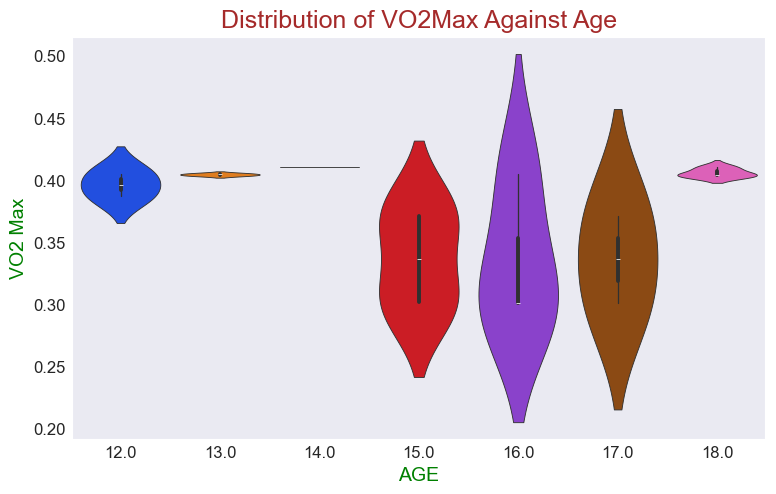

In [360]:
# Set the style of the plot
sns.set_style("dark" ,{"grid.color": ".5", "grid.linestyle": ":"})

# Defining plot area
plt.figure(figsize=(8, 5)) 

# Assigning x axis with age and y axis with VO2 Max
# Sort the athletes data by age in ascending order
sns.violinplot(x=ath.sort_values(by='age')['age'], y=final_table['VO2'],palette="bright")

# Assigning title and labels
plt.title('Distribution of VO2Max Against Age', fontsize=18, color ='brown')
plt.xlabel('AGE', fontsize=14, color='green');
plt.ylabel('VO2 Max', fontsize=14, color='green');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Q78. Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

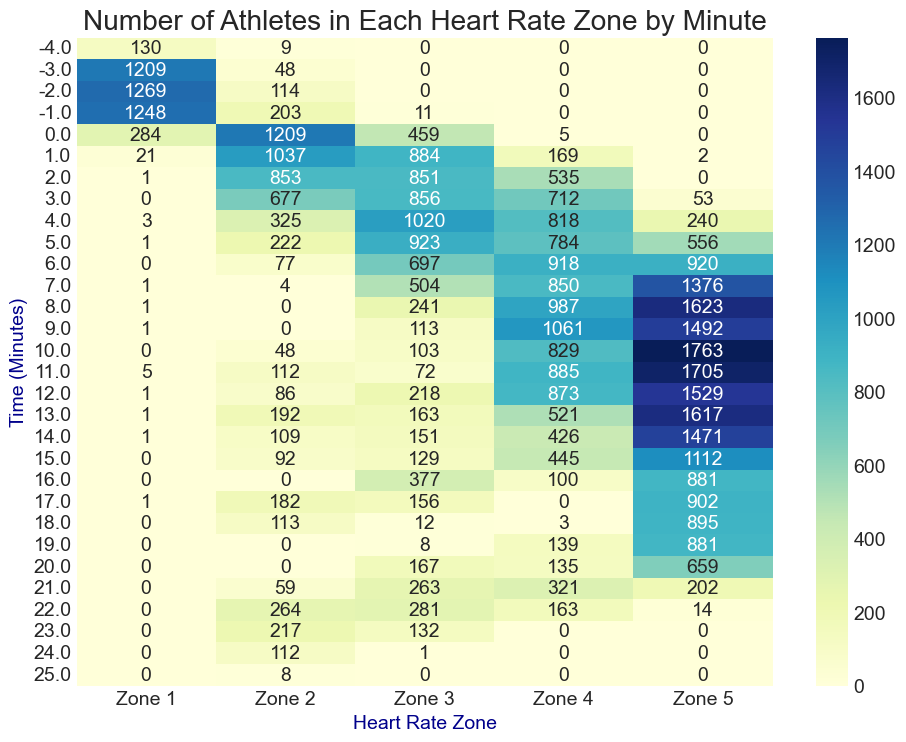

In [788]:
#Calculate time in minutes,Heart Rate(HR)=60/(RR/1000),Max HeartRate(MaxHR)=220-age
zone_merged=pd.DataFrame(final_table)
zone_ath=pd.DataFrame(ath)
zone_det=zone_merged.merge(zone_ath[['ID','age']],on='ID')
zone_det['HR']=60/(zone_det['RR']/1000)
zone_det['MaxHR']=220-zone_det['age']

# Create the 'Zone' column
conditions = [
    zone_det['HR'] < 100,
    (zone_det['HR'] >= 100) & (zone_det['HR'] < 120),
    (zone_det['HR'] >= 120) & (zone_det['HR'] < 135),
    (zone_det['HR'] >= 135) & (zone_det['HR'] < 155),
    (zone_det['HR'] >= 155)
]

choices = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']

zone_det['Zone'] = pd.cut(zone_det['HR'], bins=[0, 100, 120, 135, 155, float('inf')], labels=choices, right=False)

# Group by Minute and Zone, then count the number of athletes
zone_det['Minute'] = zone_det['time'] // 60  # Convert time to minutes

zone_counts = zone_det.groupby(['Minute', 'Zone']).size().unstack(fill_value=0)

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(zone_counts, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Labels and Title
plt.title('Number of Athletes in Each Heart Rate Zone by Minute')
plt.xlabel('Heart Rate Zone',fontsize=14, color='darkblue')
plt.ylabel('Time (Minutes)',fontsize=14, color='darkblue')

# Show the heatmap
plt.show()


## Q79. Plot the Donut chart athlete Distribution by Gender

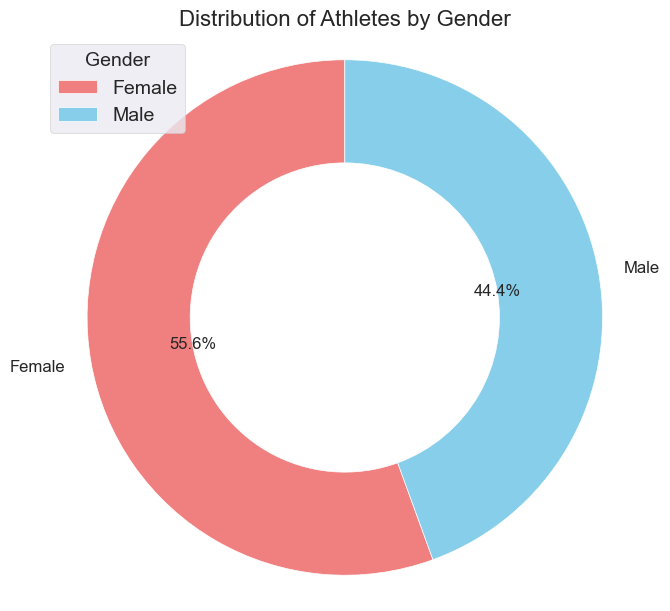

In [795]:

# Count the number of athletes by gender
gender_counts = ath['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Plotting the donut chart
plt.figure(figsize=(7,7))

# Pie chart with a 'donut' hole
plt.pie(gender_counts['Count'], labels=gender_counts['Gender'], autopct="%1.1f%%", 
        startangle=90, colors=['lightcoral','skyblue'], 
        wedgeprops={'width': 0.4}, textprops={'fontsize': 12})

# Draw a white circle at the center to create the 'donut' effect
centre_circle = plt.Circle((0, 0), 0.3, color='white', fc='white')
plt.gca().add_artist(centre_circle)

# Set title and show the plot
#lab= (gender_counts['Gender']+' '+gender_counts['Count'])
lab=gender_counts['Gender']
plt.legend(lab, loc="upper left", title="Gender")
plt.title('Distribution of Athletes by Gender', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Q80. find the size of Tuple for any given input.

In [799]:
# Took input from user
My_tuple = input("Enter Input: ")

# Count length of tuple and store in size
size = len(My_tuple)

print("Given tuple size: ",size) # Print the output

Enter Input:  Jyoti


Given tuple size:  5
